In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df=pd.read_csv('FlowStatsfile.csv')
df.head()

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,...,idle_timeout,hard_timeout,flags,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,-1,-1,...,20,100,0,50776,3351216,12694.00,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,-1,-1,...,20,100,0,209360,11834974848,52340.00,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,0,8,...,20,100,0,3,294,0.75,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,0,0,...,20,100,0,3,294,0.75,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,0,8,...,20,100,0,3,294,0.75,7.092199e-09,7.350000e+01,6.950355e-07,0


In [14]:
df = df.drop(['idle_timeout', 'hard_timeout', 'flags'], axis=1)

In [15]:
df.iloc[:, 2] = df.iloc[:, 2].str.replace('.', '')
df.iloc[:, 3] = df.iloc[:, 3].str.replace('.', '')
df.iloc[:, 5] = df.iloc[:, 5].str.replace('.', '')  
df.head()

/tmp/ipykernel_3911/2211708502.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.iloc[:, 2] = df.iloc[:, 2].str.replace('.', '')
/tmp/ipykernel_3911/2211708502.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.iloc[:, 3] = df.iloc[:, 3].str.replace('.', '')
/tmp/ipykernel_3911/2211708502.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.iloc[:, 5] = df.iloc[:, 5].str.replace('.', '')


,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond,label
0,1.589933e+09,1,10001505010003542466,10001,5050,10003,54246,6,-1,-1,4,480000000,50776,3351216,12694.00,1.057833e-04,8.378040e+05,6.981700e-03,0
1,1.589933e+09,1,10003542461000150506,10003,54246,10001,5050,6,-1,-1,4,486000000,209360,11834974848,52340.00,4.307819e-04,2.958744e+09,2.435180e+01,0
2,1.589933e+09,1,10003542461000550501,10003,54246,10005,5050,1,0,8,4,484000000,3,294,0.75,6.198347e-09,7.350000e+01,6.074380e-07,0
3,1.589933e+09,1,10005542461000350501,10005,54246,10003,5050,1,0,0,4,415000000,3,294,0.75,7.228916e-09,7.350000e+01,7.084337e-07,0
4,1.589933e+09,2,1000301000501,10003,0,10005,0,1,0,8,4,423000000,3,294,0.75,7.092199e-09,7.350000e+01,6.950355e-07,0


In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

# Assuming your dataset is loaded into a DataFrame df

# Data preprocessing
X = df.drop('label',axis=1)
y = df['label']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
X_train.corr()

/tmp/ipykernel_3911/131534602.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,timestamp,datapath_id,tp_src,tp_dst,ip_proto,icmp_code,icmp_type,flow_duration_sec,flow_duration_nsec,packet_count,byte_count,packet_count_per_second,packet_count_per_nsecond,byte_count_per_second,byte_count_per_nsecond
timestamp,1.000000,0.004482,0.003263,0.034286,-0.009398,0.018152,-0.000293,0.027679,0.000952,0.038977,0.012895,0.037165,0.005433,0.012257,0.001226
datapath_id,0.004482,1.000000,-0.087717,-0.043417,-0.058355,0.136274,0.105397,0.101254,0.000241,-0.041141,-0.034416,-0.040779,-0.008053,-0.034014,-0.006520
tp_src,0.003263,-0.087717,1.000000,-0.257855,0.352703,-0.356880,-0.413771,-0.067036,0.002013,0.143919,0.178630,0.140969,0.026957,0.174563,0.032820
tp_dst,0.034286,-0.043417,-0.257855,1.000000,-0.002287,-0.032911,-0.128450,0.103251,-0.000629,0.089597,-0.009666,0.090412,0.016115,-0.008746,-0.001790
ip_proto,-0.009398,-0.058355,0.352703,-0.002287,1.000000,-0.642647,-0.581765,-0.292040,0.000740,-0.020086,-0.016706,-0.019731,-0.003666,-0.016376,-0.003089
icmp_code,0.018152,0.136274,-0.356880,-0.032911,-0.642647,1.000000,0.821892,0.362614,0.002914,0.025821,0.048044,0.018777,0.006093,0.041033,0.009509
icmp_type,-0.000293,0.105397,-0.413771,-0.128450,-0.581765,0.821892,1.000000,0.141546,0.001107,-0.029806,-0.008598,-0.033910,-0.003516,-0.012401,0.000102
flow_duration_sec,0.027679,0.101254,-0.067036,0.103251,-0.292040,0.362614,0.141546,1.000000,-0.003689,0.014306,0.012006,-0.036422,0.003052,-0.029595,0.002470
flow_duration_nsec,0.000952,0.000241,0.002013,-0.000629,0.000740,0.002914,0.001107,-0.003689,1.000000,0.001818,0.001314,0.009096,-0.044898,0.007491,-0.037552
packet_count,0.038977,-0.041141,0.143919,0.089597,-0.020086,0.025821,-0.029806,0.014306,0.001818,1.000000,0.959755,0.815692,0.182261,0.783987,0.176670


/tmp/ipykernel_3911/3737049745.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = X_train.corr()


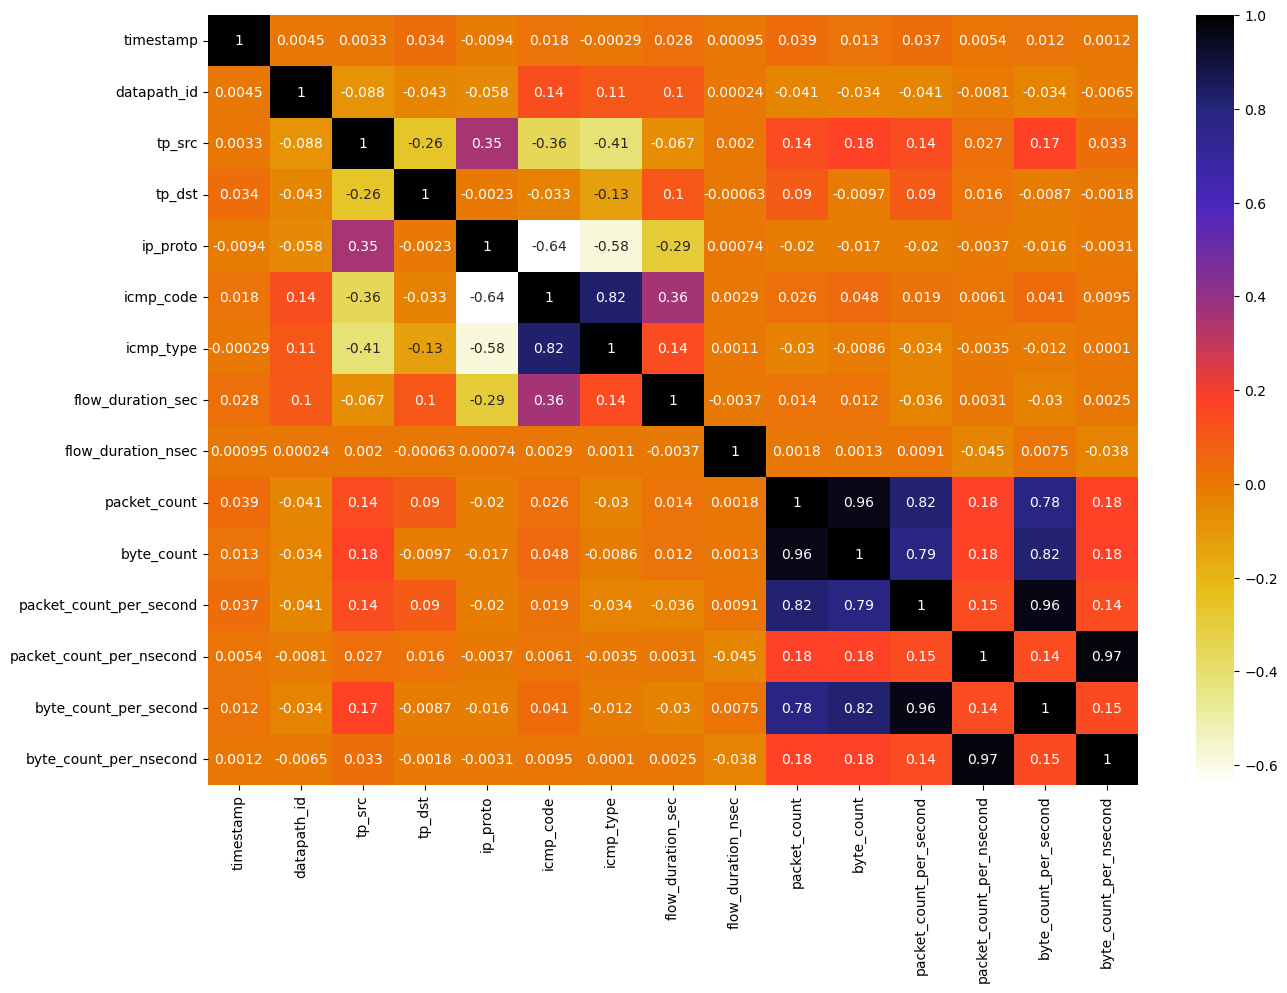

In [18]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(15,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
def correlation (dataset, threshold): 
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)): 
        for j in range(i):

            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # getting the name of column 
                col_corr.add(colname)

    return col_corr

In [20]:
corr_features=correlation(X_train,0.8)
print(len(corr_features))
print(corr_features)

/tmp/ipykernel_3911/1943080732.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5
{'byte_count', 'byte_count_per_nsecond', 'byte_count_per_second', 'icmp_type', 'packet_count_per_second'}


In [21]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,timestamp,datapath_id,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,icmp_code,flow_duration_sec,flow_duration_nsec,packet_count,packet_count_per_nsecond
975049,1.590010e+09,4,3920011134010001701,3920011134,0,100017,0,1,0,2,727000000,0,0.000000e+00
2146152,1.590073e+09,2,1594441562973710001806,159444156,29737,10001,80,6,-1,1,349000000,0,0.000000e+00
21450,1.589938e+09,4,1000184578210001505117,100018,45782,10001,5051,17,0,27,249000000,893,3.586345e-06
2175650,1.590073e+09,1,6412246604186110001806,641224660,41861,10001,80,6,-1,4,290000000,0,0.000000e+00
86477,1.589954e+09,5,10005010001801,10005,0,100018,0,1,0,46,847000000,46,5.430933e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154249,1.589963e+09,2,4010623020301000301,40106230203,0,10003,0,1,0,17,336000000,0,0.000000e+00
1810138,1.590043e+09,1,100073811210001806,10007,38112,10001,80,6,-1,5,257000000,1585,6.167315e-06
1829674,1.590047e+09,1,10001701000101,100017,0,10001,0,1,0,42,10000000,41,4.100000e-06
1692424,1.590014e+09,4,1000115050100015604621,100011,5050,100015,60462,1,0,47,162000000,46,2.839506e-07


In [22]:


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2) # Training the model


# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)


print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Test Accuracy: {test_accuracy}')

print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print("Confusion Matrix:")
print(conf_matrix)




Epoch 1/10


2024-01-03 10:24:34.199647: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 123115968 exceeds 10% of free system memory.


53436/53436 [==============================] - 86s 2ms/step - loss: 0.0385 - accuracy: 0.9862 - val_loss: 0.0272 - val_accuracy: 0.9905
Epoch 2/10
53436/53436 [==============================] - 89s 2ms/step - loss: 0.0263 - accuracy: 0.9907 - val_loss: 0.0252 - val_accuracy: 0.9900
Epoch 3/10
53436/53436 [==============================] - 90s 2ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0189 - val_accuracy: 0.9930
Epoch 4/10
53436/53436 [==============================] - 86s 2ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0200 - val_accuracy: 0.9944
Epoch 5/10
53436/53436 [==============================] - 87s 2ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0126 - val_accuracy: 0.9963
Epoch 6/10
53436/53436 [==============================] - 91s 2ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0120 - val_accuracy: 0.9964
Epoch 7/10
53436/53436 [==============================] - 172s 3ms/step - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0134 - va